# Experiment 1: Part Signal PDF Convergence

This notebook will contain gathered results from experiment 1.

# Part Signal PDF convergence
## Methodology 
For each part we have data for, run the function to simulate the PDF convergence, 100 times. Randomly shuffle the part signals between each run, otherwise it would yeild the same results each time. Track the part, part type, how many signals it needed until convergence, and the relative variance. 
## Deliverables
Associated graphs for each part run showing the the convergence of the CI
Graphs and analysis for the combined average of each part type. What does it tell us? What can we conclude about the part type and why it is behaving that way?
Graphs and analysis comparing the averages of the different types. How different are they? How can we explain this? Does this validate our assumptions? 

## Source Code

The below sections contains all of our source codes.

In [1]:
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

import os 

user_path = '~/matcher'  # CHANGE THIS LINE AS NEEDED FOR YOUR ENVIRONMENT
os.chdir(os.path.expanduser(user_path))


In [4]:
def get_metrics_series(mlruns_path: str, experiment_id: str, run_id: str, metric_name: str) -> list:
    """Get a series of metric values for a given metric name."""
    with open(f'{mlruns_path}/{experiment_id}/{run_id}/metrics/{metric_name}') as f:
        file_lines = f.readlines()
    return [float(line.split()[1]) for line in file_lines]


In [5]:
experiment_id = mlflow.get_experiment_by_name(name='Experiment 1').experiment_id
runs_df = mlflow.search_runs(experiment_ids=experiment_id, max_results=10_000)
runs_df['num_samples_for_convergence'] = runs_df.apply(
    lambda row: get_metrics_series(
            mlruns_path='mlruns', 
            experiment_id=experiment_id, 
            run_id=row['run_id'], 
            metric_name='num_samples_for_convergence'), 
    axis=1)


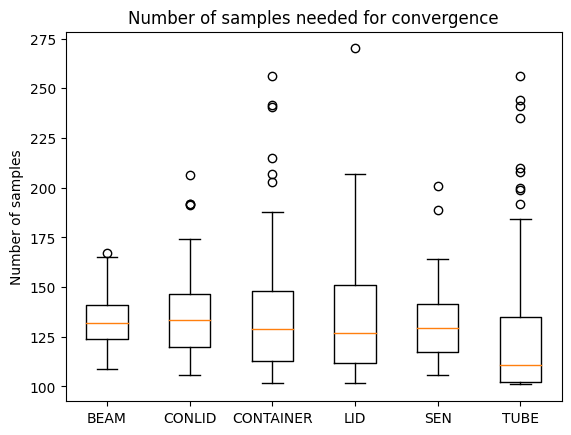

<Figure size 640x480 with 0 Axes>

In [49]:
mlflow.set_experiment('Experiment 1 Analysis')
mlflow.end_run()
mlflow.start_run()

part_type_groups = runs_df.groupby('params.part_type')
part_type_dict = {}

for part_type, part_group in part_type_groups:
    num_samples_for_convergence = part_group['num_samples_for_convergence'].values
    part_type_dict[part_type] = num_samples_for_convergence[0]

fig, ax = plt.subplots()
ax.boxplot(part_type_dict.values())
ax.set_xticklabels(part_type_dict.keys())

plt.title("Number of samples needed for convergence")
plt.ylabel("Number of samples")
# plt.savefig("psig_matcher/experiments/graphs/number_of_samples_for_convergence")
# mlflow.log_artifact("psig_matcher/experiments/graphs/number_of_samples_for_convergence.png")
plt.show()
plt.clf()
 
    